In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rpy2.robjects as ro
from functools import partial
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.ipython import html
html.html_rdataframe = partial(html.html_rdataframe, table_class = "docutils")
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [99]:
%%R
library(mlbench)
datasetnormals <- mlbench.2dnormals(300)
XR_datasetnormals <- datasetnormals$x
LABELSR_datasetnormals <- datasetnormals$classes

In [100]:
from rpy2.robjects import numpy2ri
numpy2ri.activate()
x_df_normals = np.array(ro.r['XR_datasetnormals'])
labels_df_normals = np.array(ro.r['LABELSR_datasetnormals'])
labels_df_normals[labels_df_normals == 1] = -1
labels_df_normals[labels_df_normals == 2] = 1

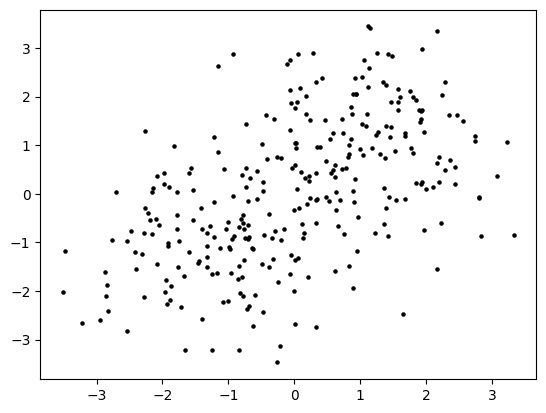

In [101]:
plt.scatter(x_df_normals[:, 0], x_df_normals[:, 1], color = 'black', s = 5)
plt.show()

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df_normals, labels_df_normals, random_state = 0, train_size = 0.7)

In [103]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 0, n_init = 'auto').fit(X_train)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [104]:
r = 0.6
p = cluster_centers.shape[0]
m = ret_[0]
covi = ret_[1]
r = ret_[2]
W = ret_[3]
H = ret_[4]

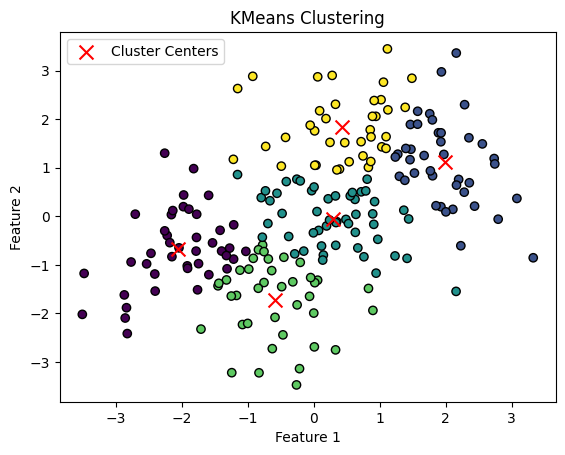

In [105]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.legend()

# Show the plot
plt.show()

In [106]:
import train_RBF

In [107]:
from sklearn.metrics import accuracy_score
lst_acc_test = list()
lst_param = list()

for i in range(1, 200, 1):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init = 'auto').fit(X_train)
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    ret_ = train_RBF.trainRBF(X_train, y_train, i, r)
    
    yhat_test = train_RBF.y_RBF(X_test, ret_)
    yhat_test[yhat_test <= -0.5] = -1
    yhat_test[yhat_test > -0.5] = 1
    yhat_train = train_RBF.y_RBF(X_train, ret_)
    yhat_train[yhat_train <= -0.5] = -1
    yhat_train[yhat_train > -0.5] = 1
    lst_acc_test.append(accuracy_score(y_test, yhat_test))
    lst_param.append(i)
lst_acc_test = np.array(lst_acc_test)
lst_param = np.array(lst_param)

H shape : (210, 1)
Haug shape : (210, 2)
yin shape : (210,)
W shape : (2,)
H shape : (210, 2)
Haug shape : (210, 3)
yin shape : (210,)
W shape : (3,)
H shape : (210, 3)
Haug shape : (210, 4)
yin shape : (210,)
W shape : (4,)
H shape : (210, 4)
Haug shape : (210, 5)
yin shape : (210,)
W shape : (5,)
H shape : (210, 5)
Haug shape : (210, 6)
yin shape : (210,)
W shape : (6,)
H shape : (210, 6)
Haug shape : (210, 7)
yin shape : (210,)
W shape : (7,)
H shape : (210, 7)
Haug shape : (210, 8)
yin shape : (210,)
W shape : (8,)
H shape : (210, 8)
Haug shape : (210, 9)
yin shape : (210,)
W shape : (9,)
H shape : (210, 9)
Haug shape : (210, 10)
yin shape : (210,)
W shape : (10,)
H shape : (210, 10)
Haug shape : (210, 11)
yin shape : (210,)
W shape : (11,)
H shape : (210, 11)
Haug shape : (210, 12)
yin shape : (210,)
W shape : (12,)
H shape : (210, 12)
Haug shape : (210, 13)
yin shape : (210,)
W shape : (13,)
H shape : (210, 13)
Haug shape : (210, 14)
yin shape : (210,)
W shape : (14,)
H shape : (

In [108]:
idx = np.argmax(lst_acc_test)
print(f"The value of K that give us the best performance in test data is : {lst_param[idx]}")

The value of K that give us the best performance in test data is : 10


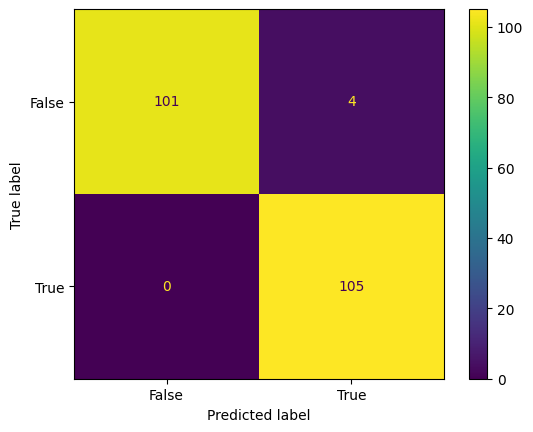

In [109]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_train, yhat_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
#plt.title(' TRAIN DATA RESULT')
cm_display.plot()
plt.show()

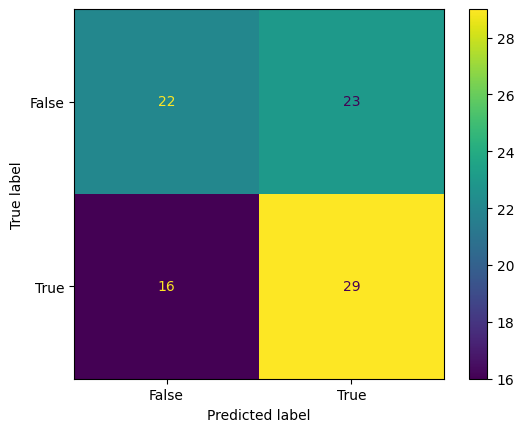

In [110]:
from sklearn import metrics
confusion_matrix_2 = metrics.confusion_matrix(y_test, yhat_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_2, display_labels = [False, True])
#plt.title(' TEST DATA RESULT')
cm_display.plot()
plt.show()

In [111]:
# Assuming m, r, p, W, train_RBF are defined elsewhere
seqx1x2 = np.linspace(start = -1.5 , stop = 1.5, num = 300)
np_grid = seqx1x2.shape[0]
shape = (np_grid, np_grid)
MZ = np.zeros(shape)

# Criando o grid de valores (n x n)
for i in range(np_grid):
    for j in range(np_grid):
        x1 = seqx1x2[i]
        x2 = seqx1x2[j]
        x1x2 = np.column_stack((x1, x2))
        N = x1x2.shape[0]  # Number of samples
        n = x1x2.shape[1]  # Input dimension

        yhat = train_RBF.y_RBF(x1x2, ret_)
        MZ[i, j] = yhat[0]
print("Completed")

Completed


In [112]:
labels_df_normals = labels_df_normals.reshape(-1, 1)
mat_plot = np.concatenate((x_df_normals, labels_df_normals), axis = 1)
index_sort = 2
sorted_indices = np.argsort(mat_plot[:, index_sort])
mat_plot = mat_plot[sorted_indices]
x1_points = mat_plot[: 150, 0 : 2]
x2_points = mat_plot[150 :, 0 : 2]

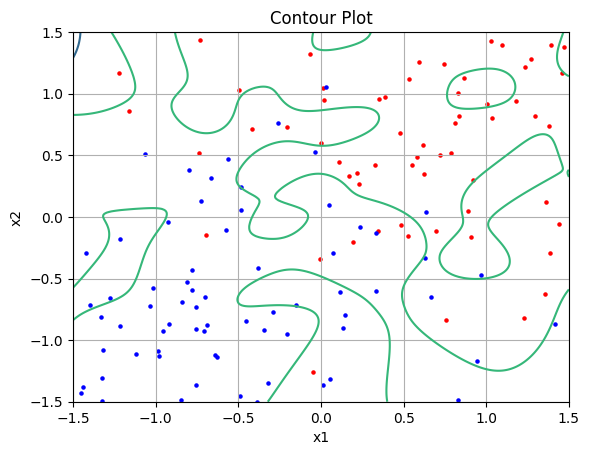

In [113]:
plt.contour(seqx1x2, seqx1x2, MZ,  levels = 1)
plt.scatter(x1_points[:, 0], x1_points[:, 1], color = 'red', label = 'data1', s = 5)
plt.scatter(x2_points[:, 0], x2_points[:, 1], color = 'blue', label = 'data2', s = 5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.show()